In [653]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
from itertools import product 
import talib as ta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
plt.style.use('seaborn')
import itertools
import warnings
warnings.filterwarnings('ignore')

In [654]:
def plot_conf_mat(cm, classes, title, cmap = plt.cm.Blues):                                 
    #Plot confusion matrix to see True Positives, False Positives, True Negatives and False Negatives 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    #why cm.max()  /2??
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

In [655]:
def model_evaluation(y_pred, y_test):
    c_mat = confusion_matrix(y_test, y_pred, normalize = 'all') ## Predicted vs. actual outcome
    auc = round(roc_auc_score(y_test, y_pred),4)
    accuracy = round(accuracy_score(y_test,y_pred) ,4)
    recall = round(recall_score(y_test, y_pred),4)
    precision = round(precision_score(y_test, y_pred),4)
    class_names = ['Positive', 'Negative'] ## Different class names
    plt.figure()
    fig, ax = plt.subplots(figsize=(6,4))
    plot_conf_mat(c_mat,classes=class_names,title="Confusion Matrix")
    plt.show()
    print(f"Accuracy: {accuracy}")
    print(f"Area under the curve (AUC): {auc}")
    print(f"Recall Score: {recall}")
    auc = round(roc_auc_score(y_test, y_pred), 4)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



In [656]:
def grid_ser(param_grid, model, X_train, y_train):

  
  
      grid = GridSearchCV(model,param_grid, cv=5, verbose = 2, n_jobs = -1)
  
      grid.fit(X_train, y_train)
  
      result = {"best_params": grid.best_params_, 'best_estimator': grid.best_estimator_, 
            'best_score':grid.best_score_ }
  
      return result

In [657]:
assets = 'BTC-USD'

In [658]:
 df = yf.download(tickers = assets, start='2015-01-01', end='2019-12-30',
                 interval= '1d')

[*********************100%***********************]  1 of 1 completed


In [659]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026


In [540]:
df['MA200'] = df['Close'].rolling(window=230).mean()
df['price_change'] = df['Close'].pct_change()
df['Upmove'] = df['price_change'].apply(lambda x: x if x > 0 else 0)
df['Downmove'] = df['price_change'].apply(lambda x: abs(x) if x < 0 else 0)
df['avg up'] = df['Upmove'].ewm(span=20).mean()
df['avg down'] = df['Downmove'].ewm(span=20).mean()

In [541]:
 df = df.dropna()

In [542]:
df['RS'] = df['avg up']/df['avg down']
df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))

#buy and sell params   
df.loc[(df['Close'] >= df['MA200']) & (df['RSI'] < 27), 'Buy'] = 'Yes'
df.loc[(df['Close'] <= df['MA200']) | (df['RSI'] > 27), 'Buy'] = 'No'

In [543]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price_change,Upmove,Downmove,avg up,avg down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2015-08-18,257.925995,257.993011,211.078995,211.078995,211.078995,42147200,250.636269,-0.181788,0.000000,0.181788,0.003772,0.025184,0.149784,13.027122,No
2015-08-19,225.671005,237.408997,222.766006,226.684006,226.684006,60869200,250.255552,0.073930,0.073930,0.000000,0.010454,0.022785,0.458795,31.450260,No
2015-08-20,226.899002,237.365005,226.899002,235.350006,235.350006,32275000,249.909109,0.038229,0.038229,0.000000,0.013099,0.020615,0.635406,38.853104,No
2015-08-21,235.354996,236.432007,231.723999,232.569000,232.569000,23173800,249.698182,-0.011816,0.000000,0.011816,0.011852,0.019777,0.599250,37.470684,No
2015-08-22,232.662003,234.957001,222.703995,230.389999,230.389999,23205900,249.551204,-0.009369,0.000000,0.009369,0.010723,0.018786,0.570786,36.337621,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034,9161.036715,-0.004974,0.000000,0.004974,0.008653,0.009094,0.951443,48.755880,No
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,9161.407658,0.007062,0.007062,0.000000,0.008501,0.008228,1.033185,50.816083,No
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,9162.910347,0.003827,0.003827,0.000000,0.008056,0.007444,1.082149,51.972707,No


In [544]:
def getsignals(df):
    buying_dates = []
    selling_dates = []
    
    for i in range(len(df)):
        
        if 'Yes' in df['Buy'].iloc[i]:
            buying_dates.append(df.iloc[i+1].name)
            for j in range(1,200):
                if df['RSI'].iloc[i + j] >= 70:
                    selling_dates.append(df.iloc[i + j + 1].name)
                    break 
                    
                elif j == 100:
                    selling_dates.append(df.iloc[i + j + 1].name)
                    
    return buying_dates, selling_dates
    

In [545]:
buy , sell = getsignals(df)

In [546]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume,MA200,price_change,Upmove,Downmove,avg up,avg down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2015-08-18,257.925995,257.993011,211.078995,211.078995,211.078995,42147200,250.636269,-0.181788,0.000000,0.181788,0.003772,0.025184,0.149784,13.027122,No
2015-08-19,225.671005,237.408997,222.766006,226.684006,226.684006,60869200,250.255552,0.073930,0.073930,0.000000,0.010454,0.022785,0.458795,31.450260,No
2015-08-20,226.899002,237.365005,226.899002,235.350006,235.350006,32275000,249.909109,0.038229,0.038229,0.000000,0.013099,0.020615,0.635406,38.853104,No
2015-08-21,235.354996,236.432007,231.723999,232.569000,232.569000,23173800,249.698182,-0.011816,0.000000,0.011816,0.011852,0.019777,0.599250,37.470684,No
2015-08-22,232.662003,234.957001,222.703995,230.389999,230.389999,23205900,249.551204,-0.009369,0.000000,0.009369,0.010723,0.018786,0.570786,36.337621,No
2015-08-23,230.376007,232.705002,225.580002,228.169006,228.169006,18406600,249.349878,-0.009640,0.000000,0.009640,0.009702,0.017915,0.541535,35.129586,No
2015-08-24,228.112000,228.139008,210.442993,210.494995,210.494995,59220700,249.020774,-0.077460,0.000000,0.077460,0.008778,0.023586,0.372155,27.121948,No
2015-08-25,210.067993,226.320999,199.567001,221.608994,221.608994,61089200,248.704565,0.052799,0.052799,0.000000,0.012970,0.021340,0.607796,37.803054,No
2015-08-26,222.076004,231.182999,220.203995,225.830994,225.830994,31808000,248.454487,0.019052,0.019052,0.000000,0.013549,0.019307,0.701772,41.237732,No


In [547]:
sell

[Timestamp('2016-02-21 00:00:00'),
 Timestamp('2016-09-05 00:00:00'),
 Timestamp('2016-09-05 00:00:00'),
 Timestamp('2017-08-06 00:00:00'),
 Timestamp('2017-08-06 00:00:00'),
 Timestamp('2017-10-10 00:00:00'),
 Timestamp('2018-04-22 00:00:00'),
 Timestamp('2018-04-22 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00'),
 Timestamp('2019-10-28 00:00:00')]

<AxesSubplot:>

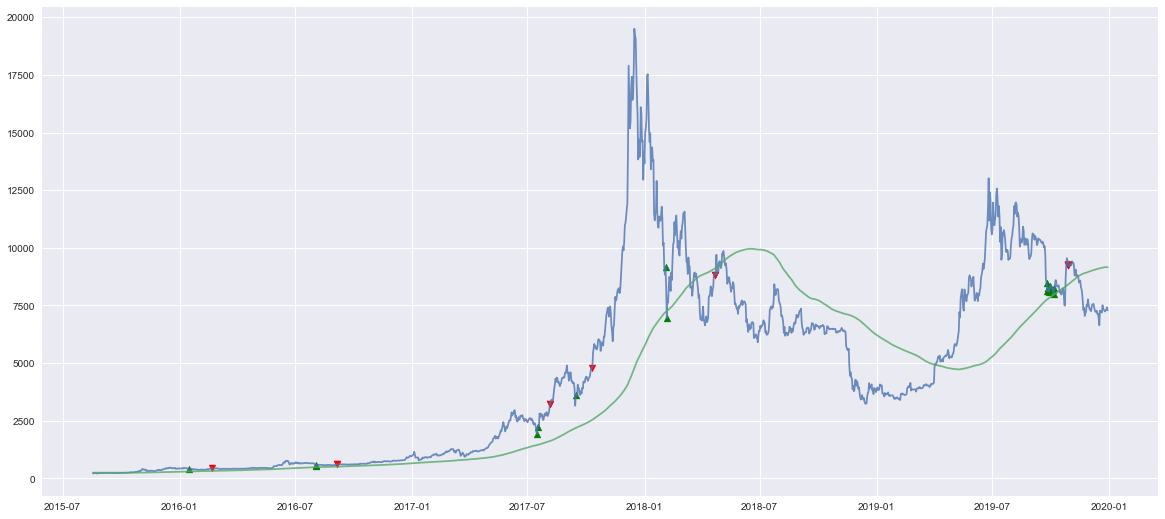

In [548]:


plt.figure(figsize = (20, 9))
plt.scatter(df.loc[buy].index,df.loc[buy]['Close'], marker= '^', c= 'g')
plt.scatter(df.loc[sell].index,df.loc[sell]['Close'], marker= 'v', c= 'r')
plt.plot(df[['Close','MA200']], alpha = 0.8)


plt.subplot()

In [549]:
df['Buy'] = df['Buy'].replace(to_replace= 'Yes', value = 1)
df['Buy'] = df['Buy'].replace(to_replace= 'No', value = 0)

In [550]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price_change,Upmove,Downmove,avg up,avg down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2015-08-18,257.925995,257.993011,211.078995,211.078995,211.078995,42147200,250.636269,-0.181788,0.000000,0.181788,0.003772,0.025184,0.149784,13.027122,0
2015-08-19,225.671005,237.408997,222.766006,226.684006,226.684006,60869200,250.255552,0.073930,0.073930,0.000000,0.010454,0.022785,0.458795,31.450260,0
2015-08-20,226.899002,237.365005,226.899002,235.350006,235.350006,32275000,249.909109,0.038229,0.038229,0.000000,0.013099,0.020615,0.635406,38.853104,0
2015-08-21,235.354996,236.432007,231.723999,232.569000,232.569000,23173800,249.698182,-0.011816,0.000000,0.011816,0.011852,0.019777,0.599250,37.470684,0
2015-08-22,232.662003,234.957001,222.703995,230.389999,230.389999,23205900,249.551204,-0.009369,0.000000,0.009369,0.010723,0.018786,0.570786,36.337621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034,9161.036715,-0.004974,0.000000,0.004974,0.008653,0.009094,0.951443,48.755880,0
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,9161.407658,0.007062,0.007062,0.000000,0.008501,0.008228,1.033185,50.816083,0
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,9162.910347,0.003827,0.003827,0.000000,0.008056,0.007444,1.082149,51.972707,0


Text(0.5, 1.0, 'RSI')

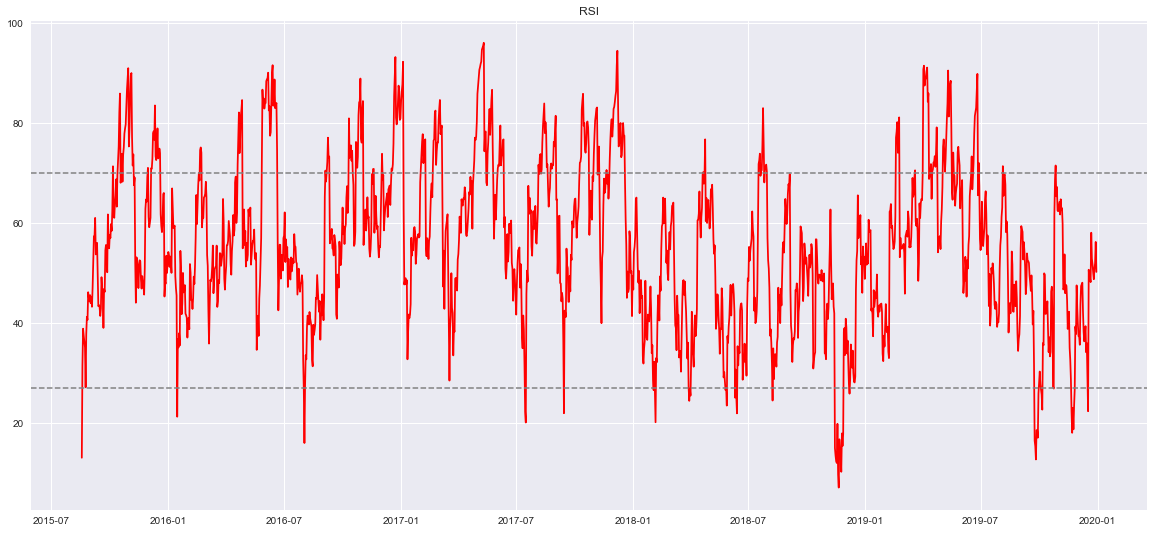

In [551]:
rsi = df['RSI']
plt.figure(figsize = (20, 9))
plt.plot(rsi, 'r-')
plt.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.axhline(27, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.title('RSI')

In [552]:
df['returns'] = np.log(df['Close']/df['Close'].shift(1))

In [553]:
df["RevRet"] = df.Buy * df.returns
df['target'] = np.where(df['returns'] > 0, 1, 0) 
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price_change,Upmove,Downmove,avg up,avg down,RS,RSI,Buy,returns,RevRet,target
Date,,,,,,,,,,,,,,,,,,
2015-08-18,257.925995,257.993011,211.078995,211.078995,211.078995,42147200,250.636269,-0.181788,0.000000,0.181788,0.003772,0.025184,0.149784,13.027122,0,NaN,NaN,0
2015-08-19,225.671005,237.408997,222.766006,226.684006,226.684006,60869200,250.255552,0.073930,0.073930,0.000000,0.010454,0.022785,0.458795,31.450260,0,0.071325,0.0,1
2015-08-20,226.899002,237.365005,226.899002,235.350006,235.350006,32275000,249.909109,0.038229,0.038229,0.000000,0.013099,0.020615,0.635406,38.853104,0,0.037517,0.0,1
2015-08-21,235.354996,236.432007,231.723999,232.569000,232.569000,23173800,249.698182,-0.011816,0.000000,0.011816,0.011852,0.019777,0.599250,37.470684,0,-0.011887,-0.0,0
2015-08-22,232.662003,234.957001,222.703995,230.389999,230.389999,23205900,249.551204,-0.009369,0.000000,0.009369,0.010723,0.018786,0.570786,36.337621,0,-0.009413,-0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034,9161.036715,-0.004974,0.000000,0.004974,0.008653,0.009094,0.951443,48.755880,0,-0.004987,-0.0,0
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,9161.407658,0.007062,0.007062,0.000000,0.008501,0.008228,1.033185,50.816083,0,0.007037,0.0,1
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,9162.910347,0.003827,0.003827,0.000000,0.008056,0.007444,1.082149,51.972707,0,0.003820,0.0,1


In [554]:
df.dropna(inplace= True)

In [555]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA200',
       'price_change', 'Upmove', 'Downmove', 'avg up', 'avg down', 'RS', 'RSI',
       'Buy', 'returns', 'RevRet', 'target'],
      dtype='object')

In [556]:
X = df[['MA200','RSI', 'RS']]
y = df.target

In [557]:
lr = LogisticRegression()

In [558]:
lr.fit(X, y)

LogisticRegression()

In [559]:
y_pred = lr.predict(X)
print(y_pred)
print(y.values)

[0 0 0 ... 0 1 0]
[1 1 0 ... 1 1 0]


<Figure size 576x396 with 0 Axes>

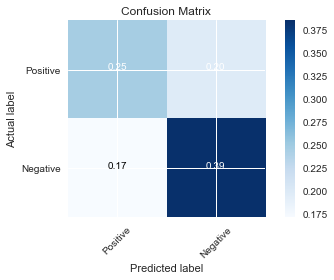

Accuracy: 0.6313
Area under the curve (AUC): 0.6235
Recall Score: 0.6926


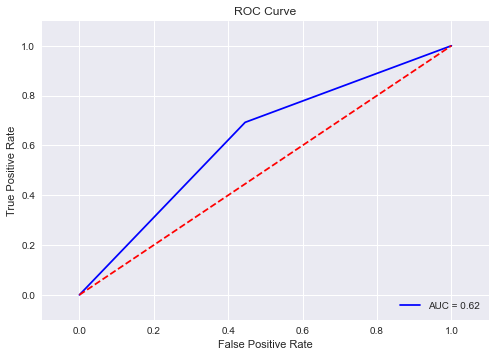

In [560]:
model_evaluation(y_pred, y)

In [561]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [200,500,1000,100, 10, 1.0, 0.1, 0.01]
# define grid search

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2'], 'C': [200, 500, 1000, 100, 10, 1.0, 0.1, 0.01]}


In [562]:
grid_ser(param_grid, lr, X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'best_params': {'C': 200, 'penalty': 'l2', 'solver': 'newton-cg'},
 'best_estimator': LogisticRegression(C=200, solver='newton-cg'),
 'best_score': 0.6313479623824451}

In [563]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [564]:
DT.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [565]:
y_pred_dt = DT.predict(X)
print(y_pred_dt)
print(y.values)

[0 0 0 ... 1 1 0]
[1 1 0 ... 1 1 0]


<Figure size 576x396 with 0 Axes>

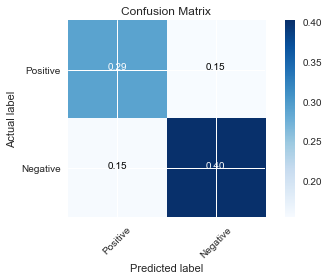

Accuracy: 0.6915
Area under the curve (AUC): 0.6877
Recall Score: 0.7218


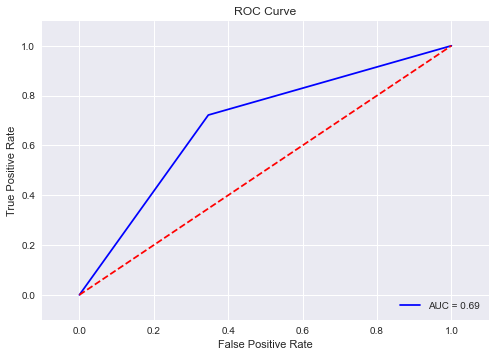

In [566]:
model_evaluation(y_pred_dt, y)

In [567]:
param_dict_dt = {"criterion": ['gini', 'entropy'],
"max_depth" : range(5,200)
}

grid_ser(param_dict_dt, DT, X, y)

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


{'best_params': {'criterion': 'entropy', 'max_depth': 5},
 'best_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=5),
 'best_score': 0.5730407523510973}

In [568]:
rf = RandomForestClassifier(criterion='entropy', max_depth=8)

In [569]:
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [570]:
y_pred_rf = rf.predict(X)
print(y_pred_rf)
print(y.values)

[0 1 0 ... 0 1 0]
[1 1 0 ... 1 1 0]


<Figure size 576x396 with 0 Axes>

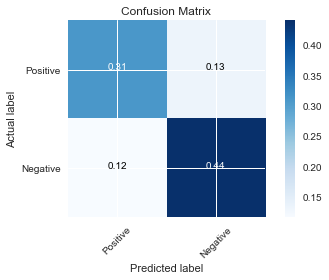

Accuracy: 0.7505
Area under the curve (AUC): 0.7453
Recall Score: 0.7905


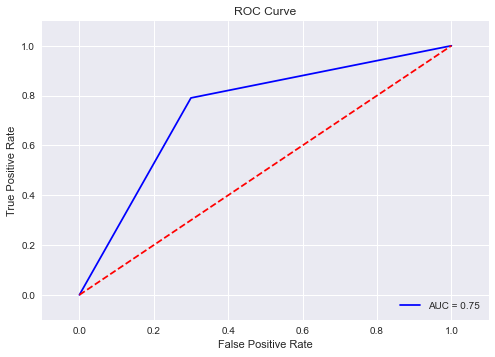

In [571]:
model_evaluation(y_pred_rf, y)

In [572]:
param_dict_rf = {"criterion": ['gini', 'entropy'],
"max_depth" : range(5,15)
}

grid_ser(param_dict_rf, rf, X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'best_params': {'criterion': 'entropy', 'max_depth': 5},
 'best_estimator': RandomForestClassifier(criterion='entropy', max_depth=5),
 'best_score': 0.5786833855799374}

In [573]:
df["lr_pred"] = lr.predict(X)
df["dt_pred"] = DT.predict(X)
df["rf_pred"] = rf.predict(X)

In [574]:
df["revlr_cross"] = df.lr_pred * df.returns
df["revdt_cross"] = df.dt_pred * df.returns
df["revrf_SMA_cross"] = df.rf_pred * df.returns
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA200',
       'price_change', 'Upmove', 'Downmove', 'avg up', 'avg down', 'RS', 'RSI',
       'Buy', 'returns', 'RevRet', 'target', 'lr_pred', 'dt_pred', 'rf_pred',
       'revlr_cross', 'revdt_cross', 'revrf_SMA_cross'],
      dtype='object')

In [607]:
df["Buy and Hold"] = df["returns"].cumsum().apply(np.exp)
df["LR Reversal System"] = df["revlr_cross"].cumsum().apply(np.exp)
df["DT ReversalSystem"] = df["revdt_cross"].cumsum().apply(np.exp)
df["RF Reversal System"] = df["revrf_SMA_cross"].cumsum().apply(np.exp)

In [608]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA200',
       'price_change', 'Upmove', 'Downmove', 'avg up', 'avg down', 'RS', 'RSI',
       'Buy', 'returns', 'RevRet', 'target', 'lr_pred', 'dt_pred', 'rf_pred',
       'revlr_cross', 'revdt_cross', 'revrf_SMA_cross', 'Buy and Hold',
       'Trenn System', 'dtTrenn System', 'rfTrenn System',
       'LR Reversal System', 'DT ReversalSystem', 'RF Reversal System'],
      dtype='object')

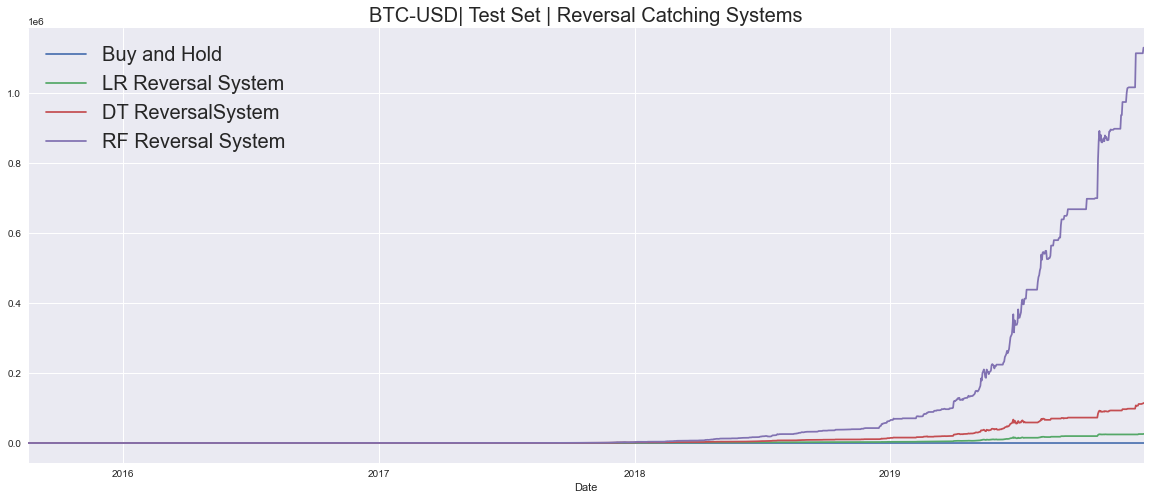

In [626]:
df[["Buy and Hold", 'LR Reversal System', 'DT ReversalSystem', 'RF Reversal System' ]].plot(figsize = (20 , 8))
plt.title('BTC-USD| Test Set | Reversal Catching Systems', fontsize= 20)
plt.legend(fontsize= 20)
plt.show()

In [627]:
t_df = yf.download(tickers='BTC-USD', start='2020-01-01', end='2021-12-30', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [628]:
t_df['returns'] = np.log(t_df['Close']/t_df['Close'].shift(1))

In [629]:
t_df['MA200'] = t_df['Close'].rolling(window=250).mean()
t_df['price_change'] = t_df['Close'].pct_change()
t_df['Upmove'] = t_df['price_change'].apply(lambda x: x if x > 0 else 0)
t_df['Downmove'] = t_df['price_change'].apply(lambda x: abs(x) if x < 0 else 0)
t_df['avg up'] = t_df['Upmove'].ewm(span=20).mean()
t_df['avg down'] = t_df['Downmove'].ewm(span=20).mean()

In [630]:
t_df['RS'] = t_df['avg up']/t_df['avg down']
t_df['RSI'] = t_df['RS'].apply(lambda x: 100-(100/(x+1)))

#buy and sell params   
t_df.loc[(t_df['Close'] >= t_df['MA200']) & (t_df['RSI'] < 27), 'Buy'] = 'Yes'
t_df.loc[(t_df['Close'] <= t_df['MA200']) | (t_df['RSI'] > 27), 'Buy'] = 'No'


In [631]:
def getsignals(t_df):
    buying_dates = []
    selling_dates = []
    
    for i in range(len(t_df)):
        
        if 'Yes' in df['Buy'].iloc[i]:
            buying_dates.append(t_df.iloc[i+1].name)
            for j in range(1,200):
                if t_df['RSI'].iloc[i + j] > 70:
                    selling_dates.append(t_df.iloc[i + j + 1].name)
                    break 
                    
                elif j == 100:
                    selling_dates.append(t_df.iloc[i + j + 1].name)
                    
    return buying_dates, selling_dates
    

In [632]:
t_df.dropna(inplace= True) 

In [633]:
t_df

,Open,High,Low,Close,Adj Close,Volume,returns,MA200,price_change,Upmove,Downmove,avg up,avg down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,,
2020-09-06,10167.216797,10353.927734,10056.885742,10280.351562,10280.351562,37071460174,0.010835,9056.125285,0.010894,0.010894,0.000000,0.008688,0.016499,0.526563,34.493361,No
2020-09-07,10280.998047,10399.153320,9916.493164,10369.563477,10369.563477,33703098409,0.008640,9068.802842,0.008678,0.008678,0.000000,0.008687,0.014927,0.581929,36.786025,No
2020-09-08,10369.306641,10414.775391,9945.110352,10131.516602,10131.516602,33430927462,-0.023224,9081.387027,-0.022956,0.000000,0.022956,0.007859,0.015692,0.500851,33.371119,No
2020-09-09,10134.151367,10350.542969,10017.250977,10242.347656,10242.347656,24128292755,0.010880,9092.976881,0.010939,0.010939,0.000000,0.008153,0.014198,0.574232,36.476951,No
2020-09-10,10242.330078,10503.912109,10238.135742,10363.138672,10363.138672,54406443211,0.011724,9104.786809,0.011793,0.011793,0.000000,0.008499,0.012845,0.661669,39.819553,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,0.007500,47247.928953,0.007528,0.007528,0.000000,0.011395,0.008804,1.294313,56.413968,No
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-0.003334,47234.866266,-0.003328,0.000000,0.003328,0.010310,0.008283,1.244782,55.452246,No
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-0.062151,47218.172594,-0.060259,0.000000,0.060259,0.009328,0.013233,0.704925,41.346404,No


In [634]:
t_df['Buy'] = t_df['Buy'].replace(to_replace= 'Yes', value = 1)
t_df['Buy'] = t_df['Buy'].replace(to_replace= 'No', value = 0)

In [635]:
t_df["RevRet"] = t_df.Buy * t_df.returns
t_df['direction'] = np.where(t_df['returns'] > 0, 1, 0)

In [636]:
t_df.dropna(inplace= True)

In [637]:
X_test = t_df[['MA200', 'RSI','RS']]
y_test = t_df.direction

In [638]:
t_df["pred"] = lr.predict(X_test)
t_df["DT_pred"] = DT.predict(X_test)
t_df["RF_pred"] = rf.predict(X_test)

In [639]:
t_df["LR_strategy"] = t_df.pred * t_df.returns
t_df["DT_strategy"] = t_df.DT_pred * t_df.returns
t_df["RF_strategy"] = t_df.RF_pred * t_df.returns

In [640]:
t_df["Buy & Hold"] = t_df["returns"].cumsum().apply(np.exp)
t_df["LR Reversal System"] = t_df["LR_strategy"].cumsum().apply(np.exp)
t_df["DT Reversal System"] = t_df["DT_strategy"].cumsum().apply(np.exp)
t_df["RF Reversal System"] = t_df["RF_strategy"].cumsum().apply(np.exp)

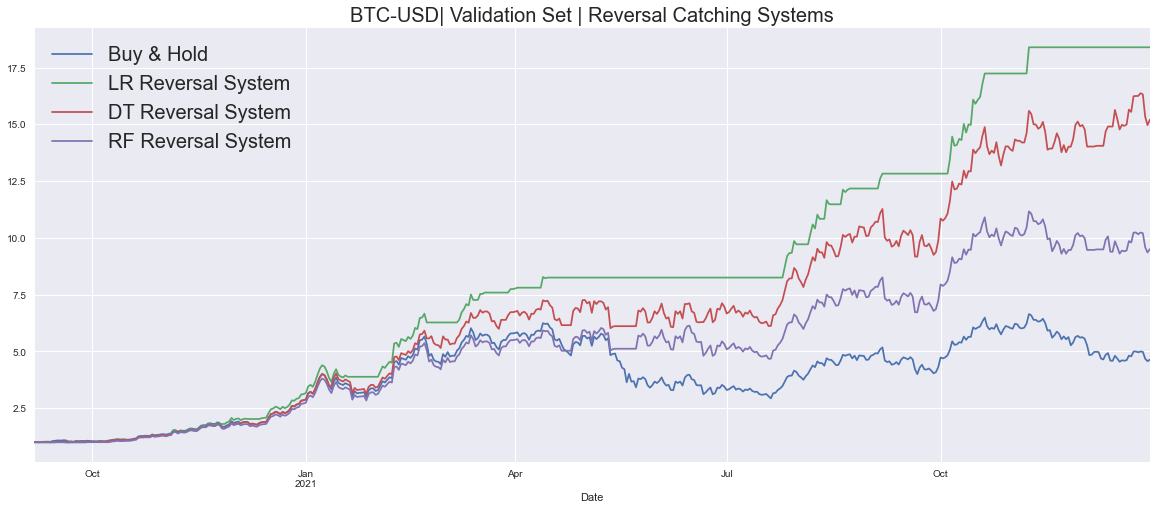

In [641]:
t_df[["Buy & Hold","LR Reversal System", 'DT Reversal System','RF Reversal System']].plot(figsize = (20 , 8))
plt.title('BTC-USD| Validation Set | Reversal Catching Systems', fontsize= 20)
plt.legend(fontsize= 20)
plt.show()

In [604]:
print(t_df.pred.value_counts(),
t_df.DT_pred.value_counts(),
t_df.RF_pred.value_counts())

0    304
1    177
Name: pred, dtype: int64 1    408
0     73
Name: DT_pred, dtype: int64 1    428
0     53
Name: RF_pred, dtype: int64


Text(0.5, 1.0, 'RSI')

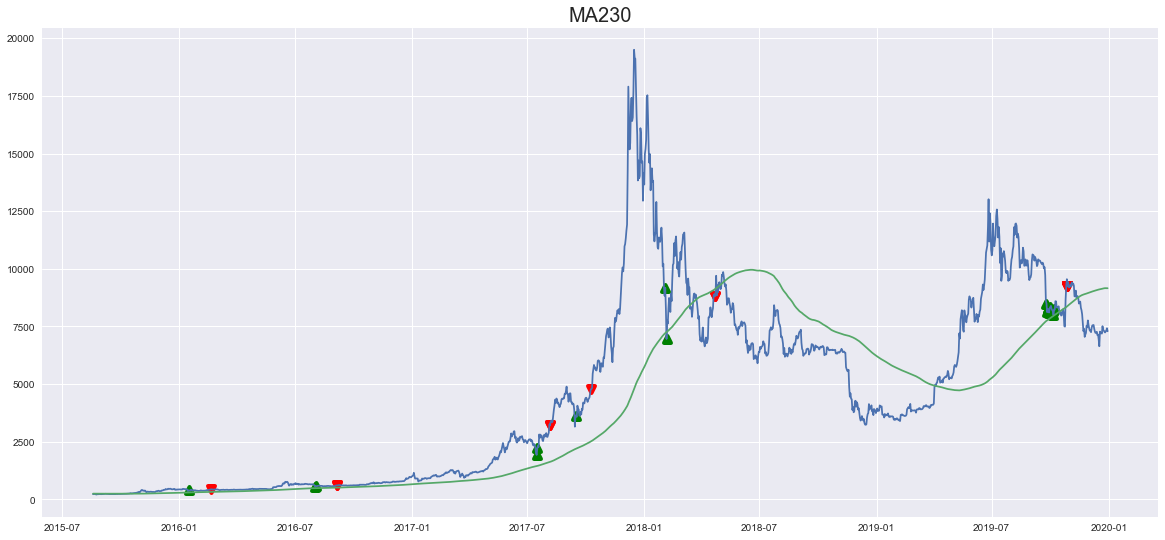

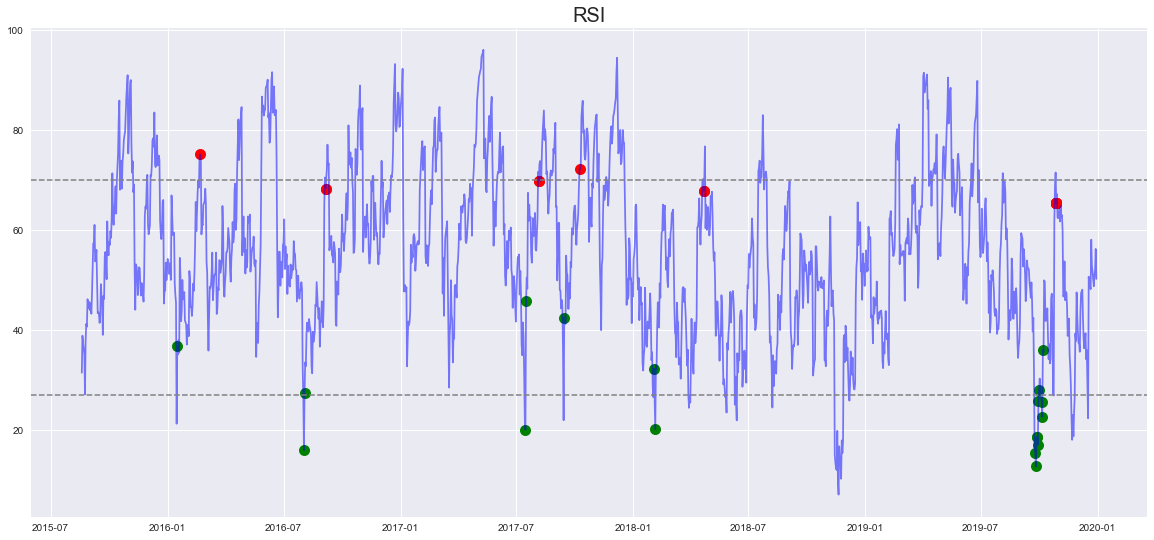

In [651]:
emas = df[['Close','MA200']]

rsi = df['RSI']
plt.figure(figsize=(20,9))

plt.scatter(df.loc[buy].index,df.loc[buy]['Close'], marker= '^', c= 'g', linewidths= 4)
plt.scatter(df.loc[sell].index,df.loc[sell]['Close'], marker= 'v', c= 'r', linewidths= 4)
plt.plot(emas)
plt.title('MA230', fontsize = 20)

rsi = df['RSI']
plt.figure(figsize = (20, 9))
plt.plot(rsi, 'b-', alpha = 0.5)
plt.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.axhline(27, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.scatter(df.loc[buy].index,df.loc[buy]['RSI'], marker= 'o', c= 'g', linewidths= 4)
plt.scatter(df.loc[sell].index,df.loc[sell]['RSI'], marker= 'o', c= 'r', linewidths= 4)
plt.title('RSI', fontsize = 20)




In [645]:
RFR = 187
daily_returnLR =t_df['LR Reversal System'].pct_change(1)
buyLR = daily_returnLR.sum()
stdLR = daily_returnLR.std()*np.sqrt(252)

LRshapre = (buyLR-RFR/100)/stdLR
LRshapre

3.205983652350466

In [646]:
daily_returnDT =t_df['DT Reversal System'].pct_change(1)
buyDT = daily_returnDT.sum()
stdDT = daily_returnDT.std()*np.sqrt(252)

DTshapre = (buyDT-RFR/100)/stdDT
DTshapre

2.0550956529762177

In [648]:
daily_returnRF =t_df['RF Reversal System'].pct_change(1)
buyRF = daily_returnRF.sum()
stdRF = daily_returnRF.std()*np.sqrt(252)

RFshapre = (buyRF-RFR/100)/stdRF
RFshapre

1.2130885321629556

In [652]:
daily_returnBH =t_df['Buy & Hold'].pct_change(1)
buyBH = daily_returnBH.sum()
stdBH = daily_returnBH.std()*np.sqrt(365)

BHshapre = (buyBH-RFR/100)/stdBH
BHshapre

0.035497162836145284